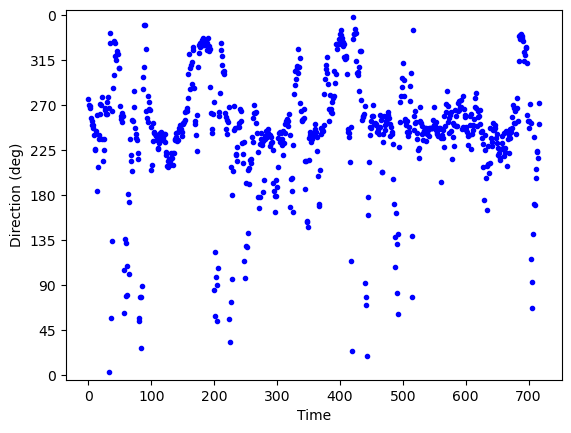

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# angles in degrees, 0–360
ang = np.loadtxt("/data/wto/EPAMetData/hourly_WINDDIR_2020_06_Franklin.csv", delimiter=',',usecols=[13],max_rows=718)
time = np.arange(0,len(ang))

# unwrap in radians, then convert back to degrees
unw = np.rad2deg(np.unwrap(np.deg2rad(ang), discont=np.deg2rad(180)))

# show smoothly, but label in 0–360
plt.plot(time, (unw % 360),'b.')
plt.ylim(-5, 365)
plt.yticks([0,45,90,135,180,225,270,315,360], ['0','45','90','135','180','225','270','315','0'])
plt.ylabel('Direction (deg)')
plt.xlabel('Time')
plt.show()


# plot_angles_no_jump(time, angles_deg, tol=10); plt.show()

This is -1!


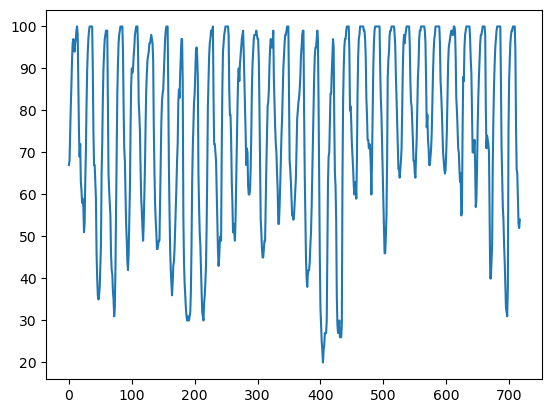

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# === Load and parse observed data ===
df = pd.read_csv("/home/mpasillaspablo/CIMIS/109_Carneros_hly2020.csv", dtype=str)
 
data = df['Rel Hum (%)'][3640:3640+718].fillna(-1).astype(float).to_numpy()
#print(data)
#for idata in range(0,4):
#    print(idata)

## Replace -1 values with average of its neighbors?
for idata in range(0,len(data)):
    #print(idata)

    if(data[idata] == -1):
        print("This is -1!")
        # two -1s in a row
        if(data[idata+1] == -1):
            # three -1s in a row
            if(data[idata+2] == -1):
                data[idata] = (data[idata+3]+data[idata-1])/2
                data[idata] = (data[idata+2]+data[idata-1])/2
                data[idata] = (data[idata+1]+data[idata-1])/2
            # three -1s in a row
            data[idata] = (data[idata+2]+data[idata-1])/2
            data[idata] = (data[idata+1]+data[idata-1])/2
        # two -1s in a row
        data[idata] = (data[idata+1]+data[idata-1])/2
        
plt.plot(data)


DataFrame after filling NaNs with average of above and below:
      Rel Hum (%)
0             100
1             100
2             100
3             100
4             100
...           ...
8779           95
8780           99
8781          100
8782          100
8783          100

[8784 rows x 1 columns]


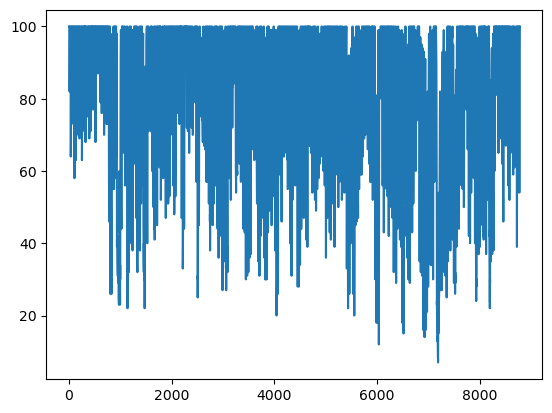

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# === Load and parse observed data ===
df = pd.read_csv("/home/mpasillaspablo/CIMIS/109_Carneros_hly2020.csv", usecols=["Rel Hum (%)"])


##  [1,2,nan,4]
## [4,nan,2,1]
## add [5,nan,nan,5]/2

# Forward fill and backward fill
df_ffill = df.ffill()
df_bfill = df.bfill()

# Calculate the average of ffill and bfill for NaN positions
df_filled = (df_ffill + df_bfill) / 2

# Use combine_first to apply the calculated averages only to NaN positions
df_final = df.fillna(df_filled)

# Convert to integer if needed (after filling)
df_final = df_final.round().astype('Int64')

print("\nDataFrame after filling NaNs with average of above and below:")
print(df_final)

# Convert to numpy array
data = df_final['Rel Hum (%)'].to_numpy()

plt.plot(data)